# Calculate Empirical Semi-Variogram

The empirical semi-variogram is a visual tool for quantifying spatial covariance. 
Semi-variances are binned for distance intervals. The average values for 
semi-variance and distance interval can be fit to mathematical models designed 
to explain how semivariance changes over distance.

![Explaination of a Semivariogram](figures/semivariogram_explaination.jpg)

For this notebook the following steps will be carried out:

    1. A set of random points within a radius will be generated
    2. The points will be populated with the elevation from a DEM
    3. The points will be split into sets using the angle to allow comparison of the north-south and east-west structures in the DEM
    4. Semi-variograms will be calculated for the whole dataset and the north-south and east-west sets.

## 1. Import Modules

In [1]:
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt
import rsgislib
import rsgislib.tools.mapping
import rsgislib.vectorattrs
import rsgislib.vectorstats
import rsgislib.vectorutils.createvectors
import rsgislib.zonalstats

## 2. Create Random Points

In [2]:
rsgislib.vectorutils.createvectors.create_random_pts_in_radius(
    centre_x=266500,
    centre_y=278100,
    radius=10000,
    n_pts=5000,
    epsg_code=27700,
    out_vec_file="ran_smpl_pts.geojson",
    out_vec_lyr="ran_smpl_pts",
    out_format="GeoJSON",
    rnd_seed=None,
    n_pts_multi_bbox=3,
)

### Visualise the Random Points

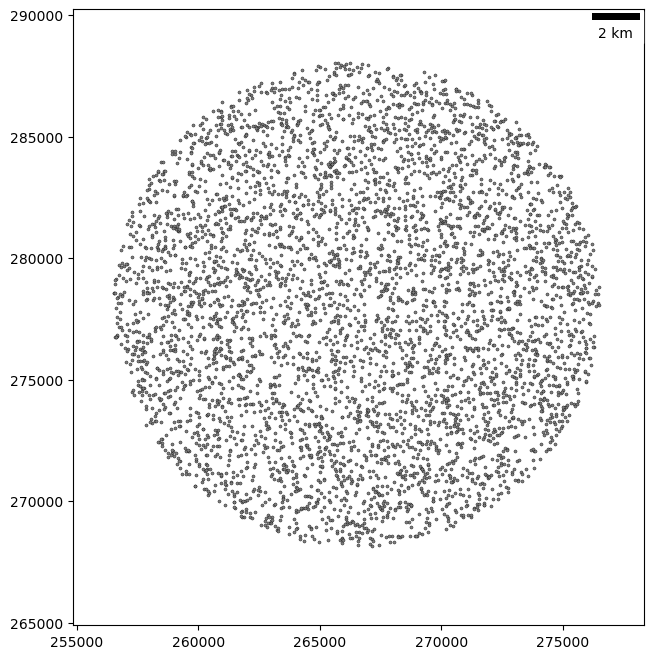

In [3]:
# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(8, 8))
ran_pts_df = geopandas.read_file("ran_smpl_pts.geojson")
bbox = [254845, 278348, 264895, 290234]
rsgislib.tools.mapping.create_vec_lyr_map(ax, ran_pts_df, bbox, vec_markersize=5)

### Random Points in a bounding box

RSGISLib also has a function (rsgislib.vectorutils.createvectors.create_random_pts_in_bbox) which allows a set of random points to be created within a bounding bbox, this can be run as shown below:

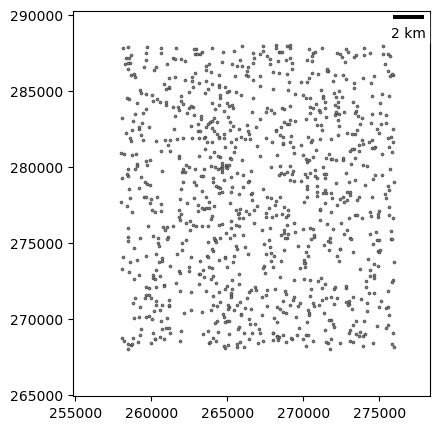

In [4]:
rsgislib.vectorutils.createvectors.create_random_pts_in_bbox(
    bbox=[258000, 276000, 268000, 288000],
    n_pts=1000,
    epsg_code=27700,
    out_vec_file="bbox_ran_pts.geojson",
    out_vec_lyr="bbox_ran_pts",
    out_format="GeoJSON",
    rnd_seed=None,
)

# Visualise the result:
fig, ax = plt.subplots(figsize=(5, 5))
ran_pts_df = geopandas.read_file("bbox_ran_pts.geojson")
bbox = [254845, 278348, 264895, 290234]
rsgislib.tools.mapping.create_vec_lyr_map(ax, ran_pts_df, bbox, vec_markersize=5)

## 3. Zonal Statistics

The next step is to populate the random points with the elevation values from the DEM which will be used to calculate the semi-variogram.


In [5]:
rsgislib.zonalstats.ext_point_band_values_file(
    vec_file="ran_smpl_pts.geojson",
    vec_lyr="ran_smpl_pts",
    input_img="../data/dem_10m_osgb.tif",
    img_band=1,
    min_thres=0,
    max_thres=2000,
    out_no_data_val=9999,
    out_field="elev",
    reproj_vec=False,
    vec_def_epsg=27700,
)

100%|██████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 43391.45it/s]


### 3.1 Visual the Points with the Elevation value

Image Data Size: 2350 x 2534


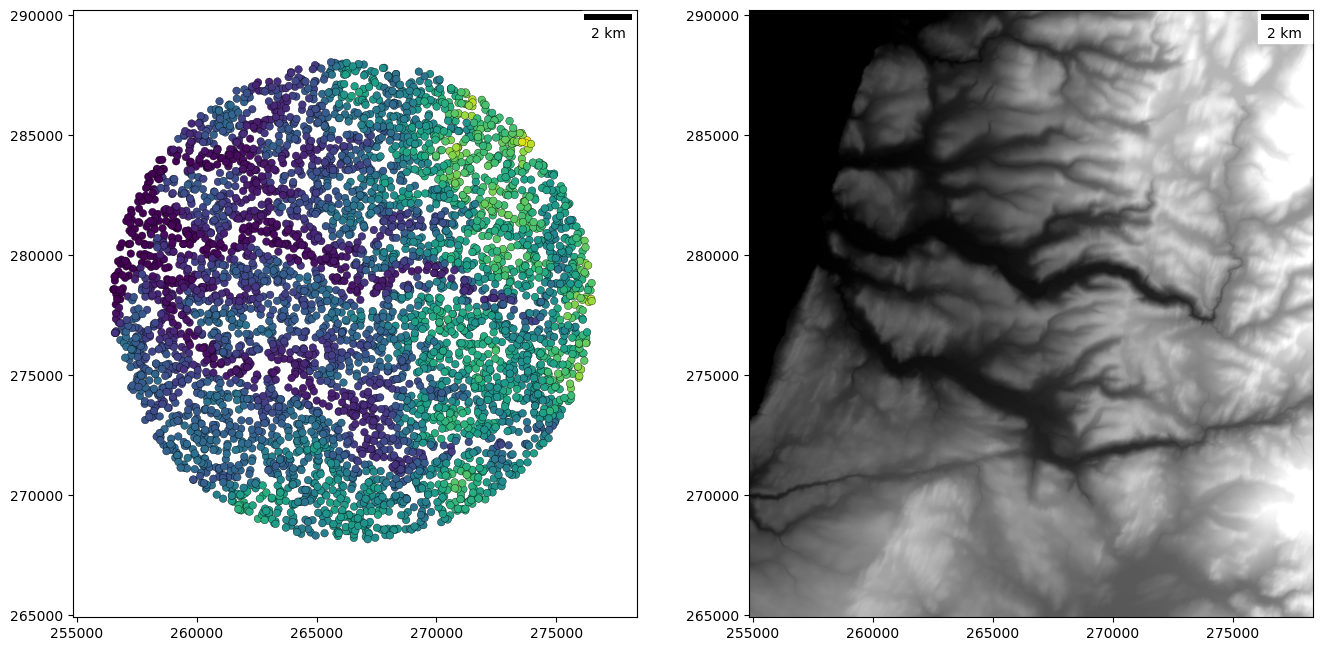

In [6]:
# Create a plot using the matplotlib library
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ran_pts_df = geopandas.read_file("ran_smpl_pts.geojson")
bbox = [254845, 278348, 264895, 290234]
rsgislib.tools.mapping.create_choropleth_vec_lyr_map(
    ax1, ran_pts_df, vec_col="elev", bbox=bbox, vec_markersize=30
)
rsgislib.tools.mapping.create_raster_img_map(
    ax2,
    input_img="../data/dem_10m_osgb.tif",
    img_bands=[1],
    img_stch=rsgislib.IMG_STRETCH_CUMULATIVE,
    bbox=bbox,
)

## 4. Create Angle Sets

In [7]:
rsgislib.vectorattrs.create_orthogonal_angle_sets(
    vec_file="ran_smpl_pts.geojson",
    vec_lyr="ran_smpl_pts",
    angle_col="angle",
    start_angle=0,
    angle_half_width=30,
    out_vec_file="ran_smpl_pts_sets.geojson",
    out_vec_lyr="ran_smpl_pts_sets",
    out_format="GeoJSON",
    out_angle_set_col="angle_set",
)

### 4.1 Visualise the Point Sets

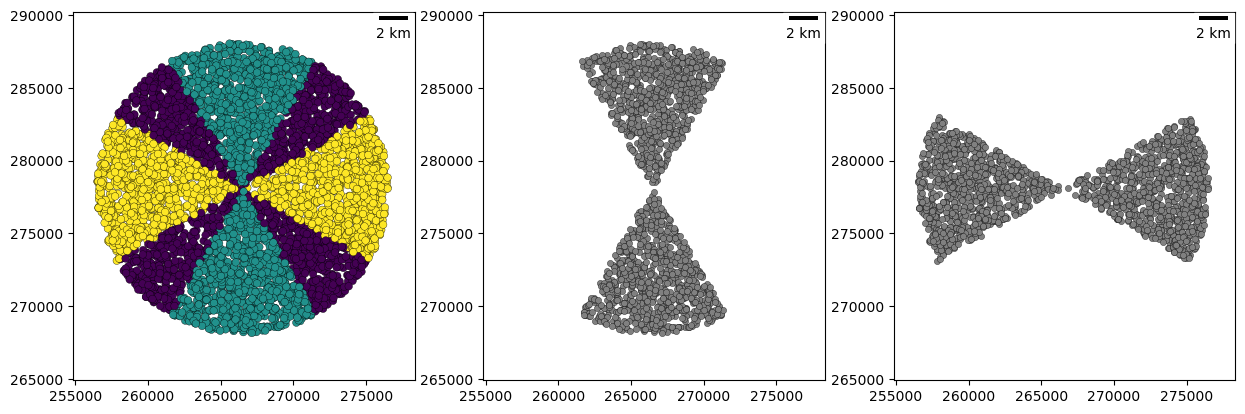

In [8]:
# Create a plot using the matplotlib library
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ran_pts_df = geopandas.read_file("ran_smpl_pts_sets.geojson")
bbox = [254845, 278348, 264895, 290234]
rsgislib.tools.mapping.create_choropleth_vec_lyr_map(
    ax1, ran_pts_df, vec_col="angle_set", bbox=bbox, vec_markersize=30
)

ran_pts_set1_df = ran_pts_df[ran_pts_df.angle_set == 1]
rsgislib.tools.mapping.create_vec_lyr_map(ax2, ran_pts_set1_df, bbox, vec_markersize=20)

ran_pts_set2_df = ran_pts_df[ran_pts_df.angle_set == 2]
rsgislib.tools.mapping.create_vec_lyr_map(ax3, ran_pts_set2_df, bbox, vec_markersize=20)

### 4.2 Populate Angles

The `rsgislib.vectorutils.createvectors.create_random_pts_in_radius` function populates the points 
with the distance and angle from the centre point. However, if you are using points from another 
source then you can use the `rsgislib.vectorattrs.calc_vec_pt_dist_angle` function to populate the angle. 

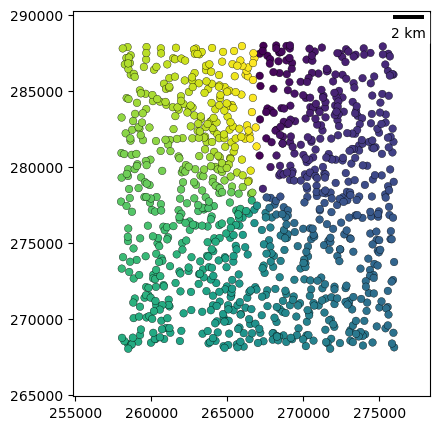

In [9]:
rsgislib.vectorattrs.calc_vec_pt_dist_angle(
    vec_file="bbox_ran_pts.geojson",
    vec_lyr="bbox_ran_pts",
    out_vec_file="bbox_ran_pts_angles.geojson",
    out_vec_lyr="bbox_ran_pts",
    out_format="GeoJSON",
    angle_col="angle",
    dist_col="dist",
)

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))
ran_pts_df = geopandas.read_file("bbox_ran_pts_angles.geojson")
bbox = [254845, 278348, 264895, 290234]
rsgislib.tools.mapping.create_choropleth_vec_lyr_map(
    ax, ran_pts_df, vec_col="angle", bbox=bbox, vec_markersize=30
)

## 5. Calculate the Global Semi-Variogram

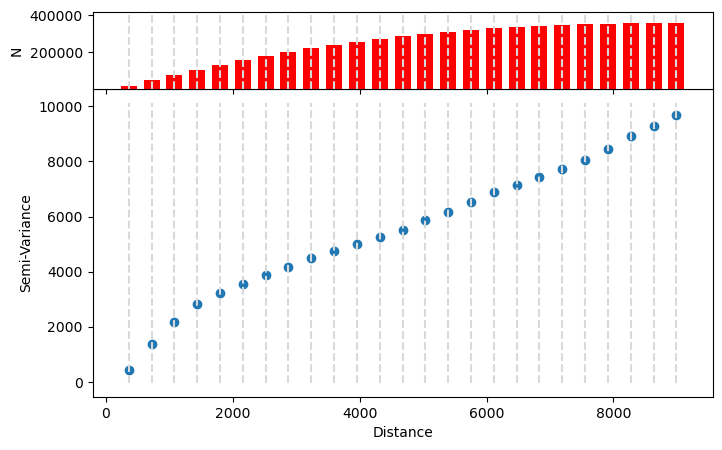

In [10]:
semivario_df = rsgislib.vectorstats.calc_empirical_semivariogram(
    vec_file="ran_smpl_pts_sets.geojson",
    vec_lyr="ran_smpl_pts_sets",
    vals_col="elev",
    pts_sel_col=None,
    pts_sel_val=None,
    out_data_file="semivario_ran_smpl_pts.csv",
    out_plot_file="semivario_ran_smpl_pts_plots.png",
    max_lag="median",
    n_lags=25,
    normalize_vals=False,
)

## 6. Calculate the Set-1 (North-South) Semi-Variogram

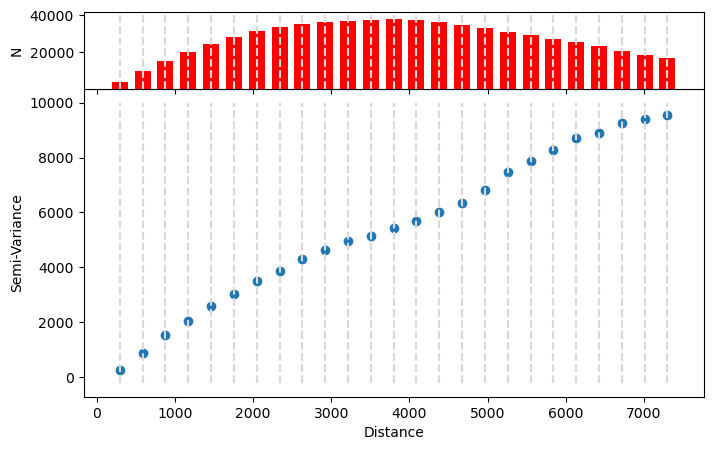

In [11]:
semivario_df = rsgislib.vectorstats.calc_empirical_semivariogram(
    vec_file="ran_smpl_pts_sets.geojson",
    vec_lyr="ran_smpl_pts_sets",
    vals_col="elev",
    pts_sel_col="angle_set",
    pts_sel_val=1,
    out_data_file="semivario_ran_smpl_pts.csv",
    out_plot_file="semivario_ran_smpl_pts_plots.png",
    max_lag="median",
    n_lags=25,
    normalize_vals=False,
)

## 7. Calculate the Set-2 (East-West) Semi-Variogram

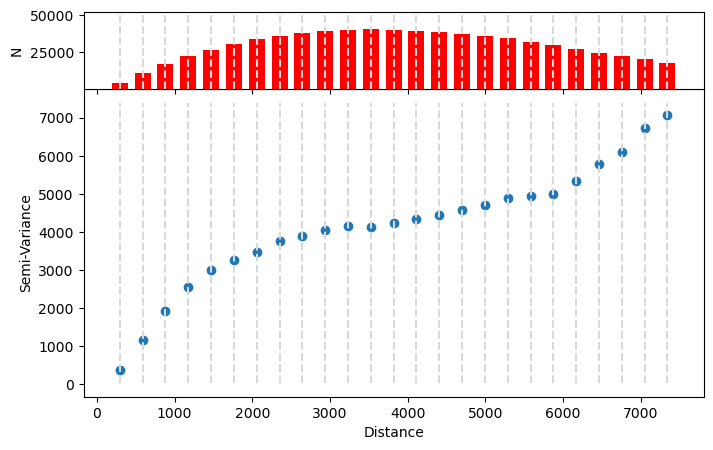

In [12]:
semivario_df = rsgislib.vectorstats.calc_empirical_semivariogram(
    vec_file="ran_smpl_pts_sets.geojson",
    vec_lyr="ran_smpl_pts_sets",
    vals_col="elev",
    pts_sel_col="angle_set",
    pts_sel_val=2,
    out_data_file="semivario_ran_smpl_pts.csv",
    out_plot_file="semivario_ran_smpl_pts_plots.png",
    max_lag="median",
    n_lags=25,
    normalize_vals=False,
)